# WordCloud

nltk 설치 및 다운로드   
- conda install nltk  
- nltk.download()

In [1]:
import nltk

WordCloud 설치  
- conda install -c conda-forge wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
with open('data/Alice.txt', 'r') as f:
    text = f.read()
stopwords = set(STOPWORDS)
len(stopwords)

192

In [5]:
# stopwords에 'said' 추가
stopwords.add('said')

In [6]:
wc = WordCloud(background_color='white',
               max_words=2000, stopwords=stopwords)
wc = wc.generate(text)

In [7]:
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}: {values[i]}')

Alice: 1.0
little: 0.29508196721311475
one: 0.27595628415300544
know: 0.2459016393442623
went: 0.226775956284153
thing: 0.2185792349726776
time: 0.2103825136612022
Queen: 0.20765027322404372
see: 0.1830601092896175
King: 0.17486338797814208


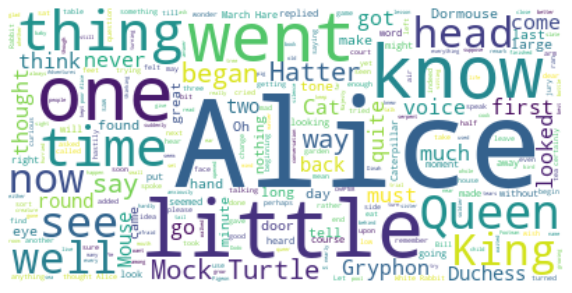

In [8]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시하기 

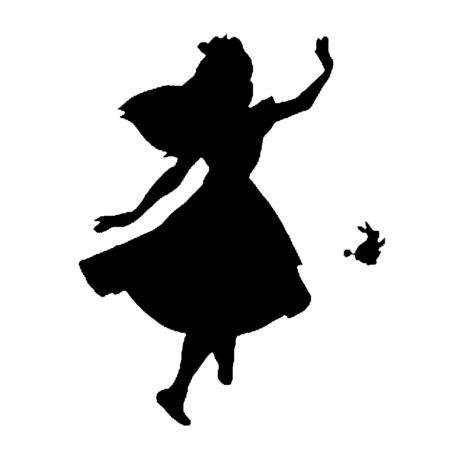

In [9]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
wc = WordCloud(background_color='white',
               max_words=2000, mask=mask,
               stopwords=stopwords)
wc = wc.generate(text)

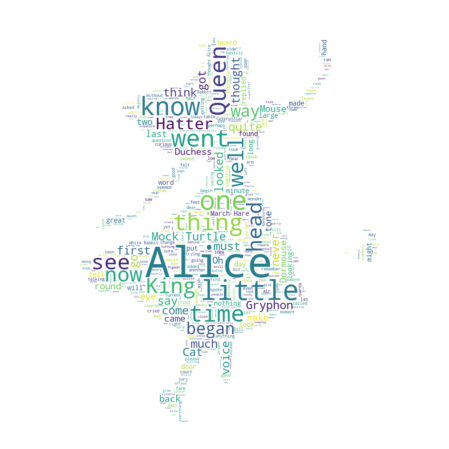

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Star Wars - A New Hope 

In [12]:
with open('data/A_new_hope.txt','r') as f:
    text = f.read()
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')
mask = np.array(Image.open('data/Stormtrooper_mask.png'))

In [13]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [14]:
wc = WordCloud(max_words=1000, mask=mask,
               stopwords=stopwords, margin=10,
               random_state=1).generate(text)
default_colors = wc.to_array()

In [15]:
import random
def grey_color(word, font_size, position,
               orientation, random_state=None,
               **kwargs):
    # return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)     
    # hue, saturation, lightness
    return f'hsl(0, 0%, {random.randint(60,100)}%)'

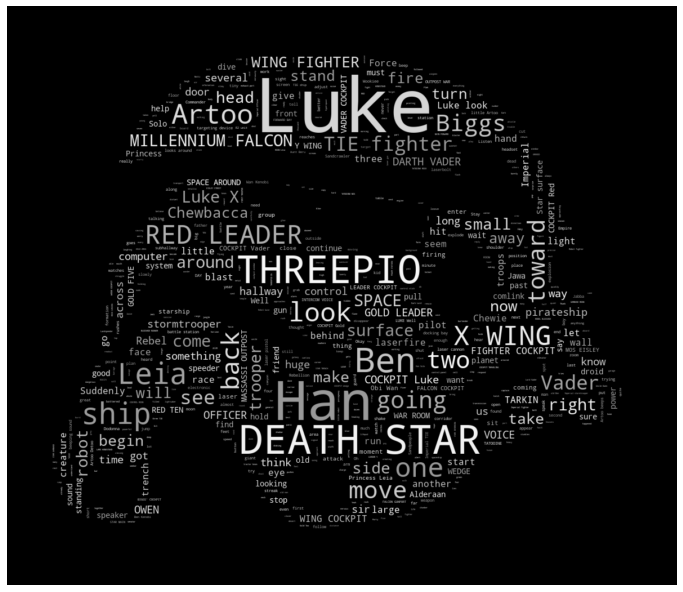

In [16]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()